# Agricultural Emissions Regression Project


![agri_image](agri_image.png)

<a id="cont"></a>

## Table of Contents
* <b>[1. Project Overview](#chapter1)
* <b>[2. Importing Packages](#chapter2)
* <b>[3. Loading Data](#chapter3)
* <b>[4. Data Cleaning](#chapter4)
* <b>[5. Exploratory Data Analysis (EDA)](#chapter5)
* <b>[6. Regression Models](#chapter6)
* <b>[7. Conclusion](#chapter7)

## 1. Project Overview <a class="anchor" id="chapter1"></a>

## 2. Importing Packages <a class="anchor" id="chapter2"></a>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


import csv
import seaborn as sns


# Displays output inline
%matplotlib inline

# Libraries for Handing Errors
import warnings
warnings.filterwarnings('ignore')

**_Insights_**<br>
We have imported various libraries to assist us with data manipulation and analysis. These libraries include:<br>
* Numpy - to work with arrays,
* Pandas - to assist us to analyse our data,
* Matplotlib - this assists us with data visualization,
* Seaborn - this is a powerful library that we use for statistical graphics, and it works seamlessly with Pandas dataframes,
* SKlearn - this is a machine learning library and we use this for our regression tasks,
* csv -
* 


## 3. Loading Data <a class="anchor" id="chapter3"></a>

In [4]:
df = pd.read_csv("co2_emissions_from_agri.csv", index_col=False)

**_Insights_**<br>
The function `df = pd.read_csv` was used to create a dataframe of the csv file.<br>

In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6965 entries, 0 to 6964
Data columns (total 31 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Area                             6965 non-null   object 
 1   Year                             6965 non-null   int64  
 2   Savanna fires                    6934 non-null   float64
 3   Forest fires                     6872 non-null   float64
 4   Crop Residues                    5576 non-null   float64
 5   Rice Cultivation                 6965 non-null   float64
 6   Drained organic soils (CO2)      6965 non-null   float64
 7   Pesticides Manufacturing         6965 non-null   float64
 8   Food Transport                   6965 non-null   float64
 9   Forestland                       6472 non-null   float64
 10  Net Forest conversion            6472 non-null   float64
 11  Food Household Consumption       6492 non-null   float64
 12  Food Retail         

**_Insights_**<br>
We used the `.info()` method to view the total number columns (31), as well as the total number of entries in our dataset, indicated as 6965 entries. The `.info()` method also indicates the presence of the following datatypes in our dataset:
+ Objects = 1 column
+ Int64 = 1 column
+ Float64 = 29 columns<br>
We can also detect a number of null values in various columns of the dataset.<br><br>

In [28]:
pd.set_option("display.max_columns", None)
df

,Area,Year,Savanna fires,Forest fires,Crop Residues,Rice Cultivation,Drained organic soils (CO2),Pesticides Manufacturing,Food Transport,Forestland,Net Forest conversion,Food Household Consumption,Food Retail,On-farm Electricity Use,Food Packaging,Agrifood Systems Waste Disposal,Food Processing,Fertilizers Manufacturing,IPPU,Manure applied to Soils,Manure left on Pasture,Manure Management,Fires in organic soils,Fires in humid tropical forests,On-farm energy use,Rural population,Urban population,Total Population - Male,Total Population - Female,total_emission,Average Temperature °C
0,Afghanistan,1990,14.7237,0.0557,205.6077,686.0000,0.0,11.807483,63.1152,-2388.8030,0.0000,79.0851,109.6446,14.2666,67.631366,691.7888,252.21419,11.997000,209.9778,260.1431,1590.5319,319.1763,0.0,0.0,NaN,9655167.0,2593947.0,5348387.0,5346409.0,2198.963539,0.536167
1,Afghanistan,1991,14.7237,0.0557,209.4971,678.1600,0.0,11.712073,61.2125,-2388.8030,0.0000,80.4885,116.6789,11.4182,67.631366,710.8212,252.21419,12.853900,217.0388,268.6292,1657.2364,342.3079,0.0,0.0,NaN,10230490.0,2763167.0,5372959.0,5372208.0,2323.876629,0.020667
2,Afghanistan,1992,14.7237,0.0557,196.5341,686.0000,0.0,11.712073,53.3170,-2388.8030,0.0000,80.7692,126.1721,9.2752,67.631366,743.6751,252.21419,13.492900,222.1156,264.7898,1653.5068,349.1224,0.0,0.0,NaN,10995568.0,2985663.0,6028494.0,6028939.0,2356.304229,-0.259583
3,Afghanistan,1993,14.7237,0.0557,230.8175,686.0000,0.0,11.712073,54.3617,-2388.8030,0.0000,85.0678,81.4607,9.0635,67.631366,791.9246,252.21419,14.055900,201.2057,261.7221,1642.9623,352.2947,0.0,0.0,NaN,11858090.0,3237009.0,7003641.0,7000119.0,2368.470529,0.101917
4,Afghanistan,1994,14.7237,0.0557,242.0494,705.6000,0.0,11.712073,53.9874,-2388.8030,0.0000,88.8058,90.4008,8.3962,67.631366,831.9181,252.21419,15.126900,182.2905,267.6219,1689.3593,367.6784,0.0,0.0,NaN,12690115.0,3482604.0,7733458.0,7722096.0,2500.768729,0.372250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6960,Zimbabwe,2016,1190.0089,232.5068,70.9451,7.4088,0.0,75.000000,251.1465,76500.2982,10662.4408,251.2681,443.0872,428.4352,22.910800,1077.2392,317.07440,2585.080847,858.9820,96.1332,2721.1459,282.5994,0.0,0.0,417.3150,10934468.0,5215894.0,6796658.0,7656047.0,98491.026347,1.120250
6961,Zimbabwe,2017,1431.1407,131.1324,108.6262,7.9458,0.0,67.000000,255.7975,76500.2982,10662.4408,203.1236,445.3881,304.7852,18.985700,1093.3441,332.77590,1227.240253,889.4250,81.2314,2744.8763,255.5900,0.0,0.0,398.1644,11201138.0,5328766.0,6940631.0,7810471.0,97159.311553,0.046500
6962,Zimbabwe,2018,1557.5830,221.6222,109.9835,8.1399,0.0,66.000000,327.0897,76500.2982,10662.4408,211.1539,492.8599,346.8512,19.057000,1108.5523,348.51070,1127.687805,966.2650,81.0712,2790.0949,257.2735,0.0,0.0,465.7735,11465748.0,5447513.0,7086002.0,7966181.0,97668.308205,0.516333
6963,Zimbabwe,2019,1591.6049,171.0262,45.4574,7.8322,0.0,73.000000,290.1893,76500.2982,10662.4408,228.6381,542.5922,350.2168,17.951400,1121.3255,327.82090,2485.528399,945.9420,85.7211,2828.7215,267.5224,0.0,0.0,444.2335,11725970.0,5571525.0,7231989.0,8122618.0,98988.062799,0.985667


**_Insights_**<br>
We executed `pd.set_option("display.max_columns", None)` to view all the columns in our dataset, as this gives us an opportunity to gain a better understanding of our dataset. We also used `df.head()` to have a look at the top 5 rows in our dataset in order to get familiar with our dataset.<br><br>

## 4. Data Cleaning <a class="anchor" id="chapter4"></a>

In [7]:
# missing values
# df.isnull().sum()

# duplicated rows - none
# df.duplicated().sum()

0

**_Insights_**<br>

In [12]:
def check_for_conditional_values(df, condition, value):
    '''
    Display the number of values in each column that matches the provided condition and value.
    Used to identify columns that contain unexpected values e.g. -1 values where the value should be nan 
    e.g check_for_conditional_values(df, "==", -1 ) will print number of records containing "-1"

    Parameters:
    df (pandas.DataFrame): The DataFrame to check for duplicate rows.
    condition:  The condition or operator to be used "<", "<=", "==", ">=", or ">" are valid
    value: The value to be used with the condition. Any integer can be used.

    Returns:
    No return value. The count of values matching the expression per column is printed to the screen.
    "e.g
    '''
    print(f"Checking columns with values {condition} {value}")
    for col in df.columns:
        if df[col].dtype in ["float64", "int64"]:
            if condition == "<":
                matching_values = df[col] < value
            elif condition == "<=":
                matching_values = df[col] <= value
            elif condition == "==":
                matching_values = df[col] == value
            elif condition == ">=":
                matching_values = df[col] >= value
            elif condition == ">":
                matching_values = df[col] > value
            else:
                print("Invalid conditional operator specified")
                return
            # print(matching_values)
            count_matches = matching_values.sum()
        
            if count_matches > 0:
                print(f"{col} has {count_matches} values matching condition {condition} {value}")
            else:
                pass

In [13]:
# looking for negative values, nan, -1, 0 values

# check_for_conditional_values(df, "<", 0)
# check_for_conditional_values(df, "==", -1)
# check_for_conditional_values(df, "==", 0)

Checking columns with values == -1


## 5. Exploratory Data Analysis <a class="anchor" id="chapter5"></a>

In [31]:
columns_to_exclude = ['Year', 'Rural population', 'Urban population', 'Total Population - Male', 'Total Population - Female']
columns_to_include = df.columns.difference(columns_to_exclude)
df[columns_to_include].describe()

,Agrifood Systems Waste Disposal,Average Temperature °C,Crop Residues,Drained organic soils (CO2),Fertilizers Manufacturing,Fires in humid tropical forests,Fires in organic soils,Food Household Consumption,Food Packaging,Food Processing,Food Retail,Food Transport,Forest fires,Forestland,IPPU,Manure Management,Manure applied to Soils,Manure left on Pasture,Net Forest conversion,On-farm Electricity Use,On-farm energy use,Pesticides Manufacturing,Rice Cultivation,Savanna fires,total_emission
count,6965.000000,6965.000000,5576.000000,6965.000000,6965.000000,6810.000000,6965.000000,6492.000000,6965.000000,6965.000000,6965.000000,6965.000000,6872.000000,6472.000000,6.222000e+03,6037.000000,6037.000000,6965.000000,6.472000e+03,6965.000000,6009.000000,6965.000000,6965.000000,6934.000000,6.965000e+03
mean,6018.444633,0.872989,998.706309,3503.228636,3035.723356,668.452931,1210.315532,4847.580384,1658.629808,3872.724461,2043.210539,1939.581760,919.302167,-17828.285678,1.999150e+04,2263.344946,923.225603,3518.026573,1.760564e+04,1626.681460,3008.982252,333.418393,4259.666673,1188.390893,6.409124e+04
std,22156.742542,0.555930,3700.345330,15861.445678,11693.029064,3264.879486,22669.847760,25789.143619,11481.343725,19838.216846,8494.249260,5616.748808,3720.078752,81832.210543,1.114209e+05,7980.542461,3226.992039,9103.556202,1.011575e+05,9343.182193,12637.864430,1429.159367,17613.825187,5246.287783,2.283130e+05
min,0.340000,-1.415833,0.000200,0.000000,0.001900,0.000000,0.000000,0.000000,0.000000,0.000100,0.000000,0.000100,0.000000,-797183.079000,0.000000e+00,0.432900,0.049000,0.000700,0.000000e+00,0.000000,0.031900,0.000000,0.000000,0.000000,-3.918841e+05
25%,86.680500,0.511333,11.006525,0.000000,360.358799,0.000000,0.000000,11.399950,67.631366,209.587728,26.818500,27.958600,0.000000,-2848.350000,3.903153e+01,37.632100,16.303000,139.669900,0.000000e+00,8.037600,13.291900,6.000000,181.260800,0.000000,5.221244e+03
50%,901.275700,0.834300,103.698200,0.000000,1115.052400,0.000000,0.000000,155.471100,74.018133,344.760200,172.042600,204.962800,0.517900,-62.920000,8.037066e+02,269.856300,120.443900,972.567400,4.444000e+01,29.120700,141.096300,13.000000,534.817400,1.651850,1.214765e+04
75%,3006.442100,1.206750,377.640975,690.408800,2024.869900,9.577875,0.000000,1377.151950,281.791000,1236.913400,1075.999100,1207.000900,64.950775,0.000000,6.155175e+03,1126.818900,460.120200,2430.792600,4.701746e+03,499.944700,1136.925400,116.325487,1536.640000,111.081400,3.513973e+04
max,213289.701600,3.558083,33490.074100,241025.069600,170826.423300,51771.256800,991717.543100,466288.200700,175741.306100,274253.512500,133784.065300,67945.765000,52227.630600,171121.076000,1.861641e+06,70592.646500,34677.360300,92630.756800,1.605106e+06,165676.299000,248879.176900,16459.000000,164915.255600,114616.401100,3.115114e+06


**_Insights_**<br>
The `.describe()` method provides the summary statistics of our numerical columns. It shows that the mean value of the Average Temperature is 0.87 degrees celsius. The max average temperature is indicated as 3.558 degrees celcius, whilst the min temperature is indicated as -1,415 degrees celcius. Important to note that we have excluded certain features from our `.describe()` method, and we have captured those features in a variable named `columns_to_exclude`.<br><br>

<span style='color:red'>**_Exploring the target variable_**</span>

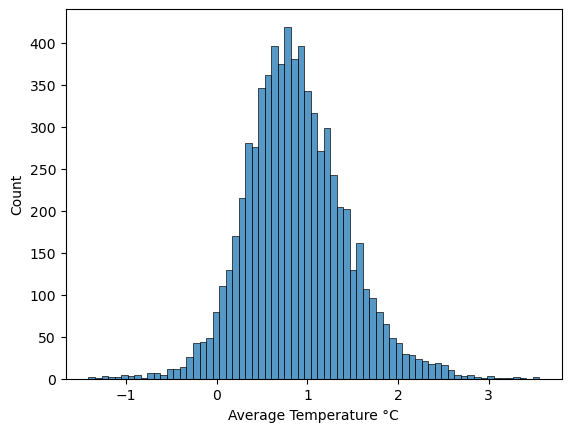

In [39]:
sns.histplot(df['Average Temperature °C'])
plt.show()

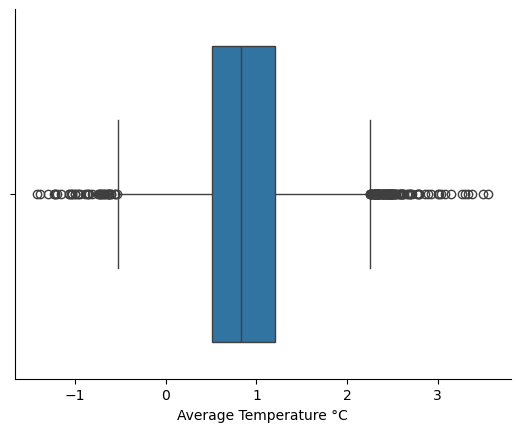

In [25]:
sns.boxplot(x=df['Average Temperature °C'])
sns.despine()
plt.show()

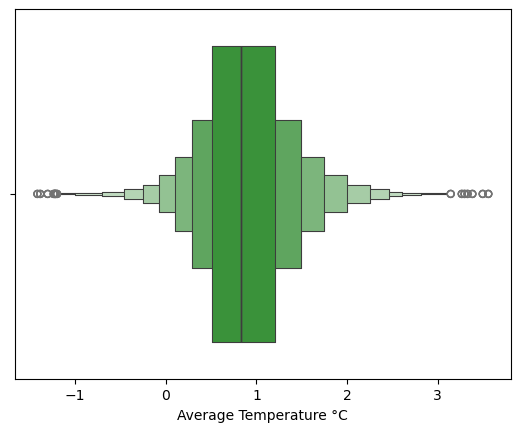

In [42]:
sns.boxenplot(x=df['Average Temperature °C'])
plt.show()


<span style='color:red'>**_Exploring the features_**</span>

## 6. Regression Models <a class="anchor" id="chapter6"></a>

## 7. Conclusion <a class="anchor" id="chapter7"></a>